In [7]:
import numpy as np
import tensorflow as tf
import keras as ks
import seaborn as sns
import scipy.stats as sp_stats
import scipy as scipy
import pandas as pd
plt.xkcd();

In [81]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [82]:
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
X = np.array(iris.iloc[:,2:4])
Y = np.array(iris.iloc[:,4] == "setosa", dtype='float')

In [9]:
print(X.shape, Y.shape)

(150, 2) (150,)


(0, 8)

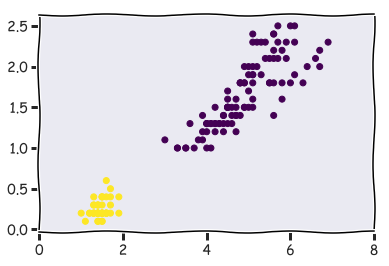

In [15]:
plt.scatter(X[:,0],X[:,1], c=Y,cmap='viridis')
plt.xlim([0,8])

In [6]:
def F(x, theta):
    #line = theta[0] + t
    1+np.exp(-line)

## The logistic regression finds the seperating hyperplane (argument to exponential function). The sigmoid function then squishes this hyperplane to the range [0,1]. 

## Softmax

In [71]:
y = np.random.rand(82,10)
y.shape

(82, 10)

In [132]:
def my_softmax(Y):
    return np.exp(Y)/np.sum(np.exp(Y),axis=1)

In [73]:
res=my_softmax(y)
np.sum(res,axis=0)
res.shape

ValueError: operands could not be broadcast together with shapes (82,10) (82,) 

In [69]:
def my_softmax2(y):
    y = np.exp(y)
    return y/np.sum(y, axis = 1).reshape(-1,1)

In [83]:
res=my_softmax2(y)
res.shape

(82, 10)

## CLASSIFIER

In [97]:
def one_hot_encode(arr,n):
    arr1h = np.zeros([arr.shape[0], n]) # Init array
    arr1h[np.arange(len(Y_train)), Y_train] = 1 # Assign
    return arr1h

In [147]:
def one_hot_decode(arr):
    return np.argmax(arr,axis=1)

In [104]:
# DATA
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels
Y_train_1h = one_hot_encode(Y_train,10)
#Y_test_1h =  one_hot_encode(Y_test,10)

In [94]:
# BIAS
X_train2 = np.insert(X_train, 0, 1, axis=1)
X_test2  = np.insert(X_test,0,1,axis=1)
X_train2.shape

(55000, 785)

In [115]:
# WEIGHTS
np.random.seed(123)
W=np.random.randn(785,10)

W.shape

(785, 10)

In [143]:
def nnet(X, W):
    return X.dot(W)


In [144]:
res_3 = nnet(X_train2,W)
res_3.shape

(55000, 10)

In [145]:
res_softmax = my_softmax2(res_3)
res_softmax[1]

array([  3.99846992e-17,   2.79607370e-10,   5.95908264e-05,
         1.93397280e-12,   3.30345265e-09,   9.99939687e-01,
         7.19003516e-07,   2.20595527e-12,   1.60457065e-12,
         5.37324484e-13])

In [150]:
res1111 = one_hot_decode(res_softmax)
print(res1111[0:5])

[1 5 5 5 5]
